# Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

# Import Data

In [3]:
import pandas as pd
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

In [21]:
y = data['label']
x = data.drop(columns = ['label'])
print(y)
print(x)

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    6
Name: label, Length: 10015, dtype: int64
       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        

# Exploratory Data Analysis (EDA)

In [5]:
tabular_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [6]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

Text(0.5, 1.0, 'Frequency Distribution of Classes')

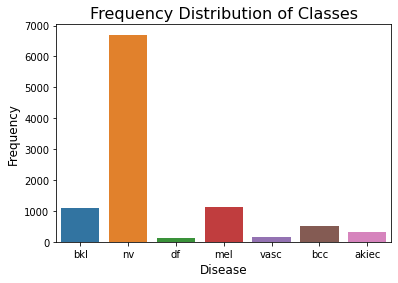

In [7]:
"""Frequency Distribution of Classes"""

sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

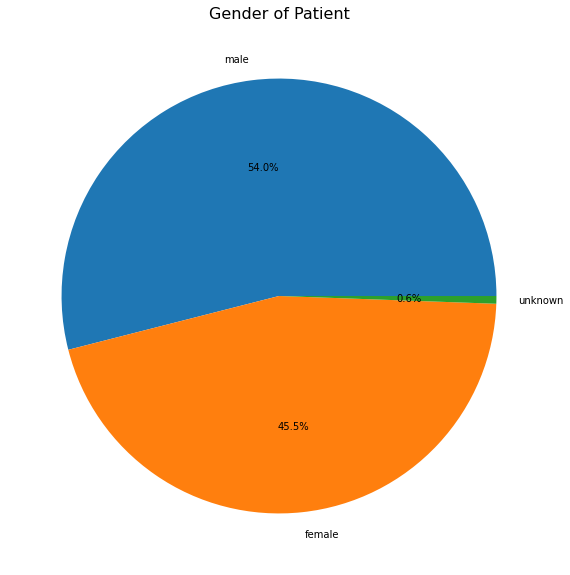

In [8]:
"""Distribution of Disease over Gender"""

bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

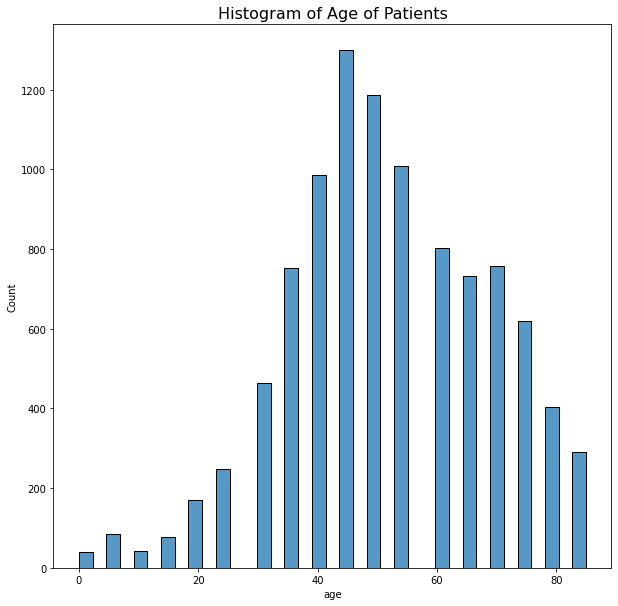

In [9]:
"""Histogram of Age of Patients"""

bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'neck'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

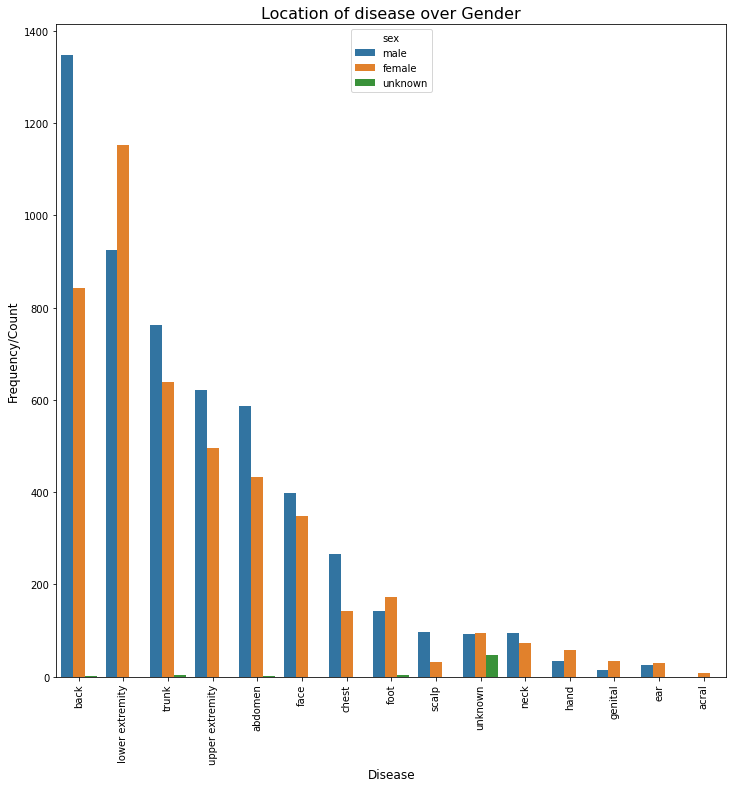

In [10]:
"""Location of disease over Gender"""

value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling
**To overcome class imbalace**

In [11]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [12]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [13]:
"""Standardization and Splitting Data"""

x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Model Training

In [14]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [15]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [16]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 [==============================] - 5s 8ms/step - loss: 1.4710 - accuracy: 0.4156 - val_loss: 0.8182 - val_accuracy: 0.6957

Epoch 00001: saving model to best_model.h5
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.6880 - accuracy: 0.7434 - val_loss: 0.4635 - val_accuracy: 0.8348

Epoch 00002: saving model to best_model.h5
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4046 - accuracy: 0.8562 - val_loss: 0.3855 - val_accuracy: 0.8630

Epoch 00003: saving model to best_model.h5
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2981 - accuracy: 0.8919 - val_loss: 0.2670 - val_accuracy: 0.9043

Epoch 00004: saving model to best_model.h5
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2152 - accuracy: 0.9211 - val_loss: 0.2185 - val_accuracy: 0.9218

Epoch 00005: saving model to best_model.h5
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - lo

# Plot Accuracy and Loss

## Accuracy (training vs validation dataset)

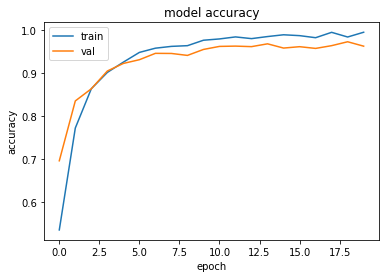

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Loss (training vs validation dataset)

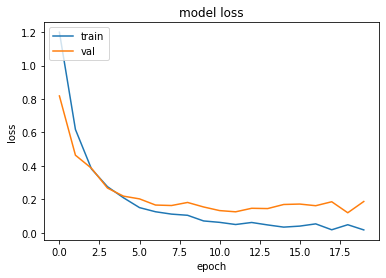

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
model.load_weights('best_model.h5')


# Model Testing

In [20]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 0s - loss: 0.1994 - accuracy: 0.9625


# Model Inference

     |████████████████████████████████| 72 kB 557 kB/s eta 0:00:01
     |████████████████████████████████| 64 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 758 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 50.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 50.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 484 kB 53.8 MB/s eta 0:00:01
     |████████████████████████████████| 245 kB 54.2 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 118 kB 58.4 MB/s eta 0:00:01
  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102289 sha256=08014a9f32ee9a1cefb648a433a47f4026544a867d83e7912f314bbd0dbdf792
  Stored in directory: /root/.cache/pip/wheels/f6/3b/58/f34ea9045a7c69bd5634978bf

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


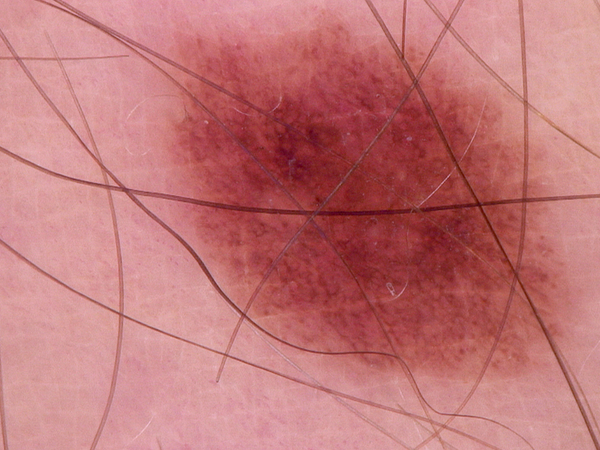

('nv', ' melanocytic nevi')


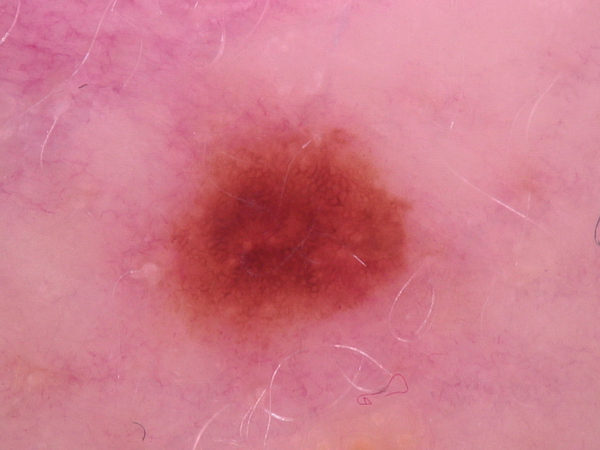

('nv', ' melanocytic nevi')


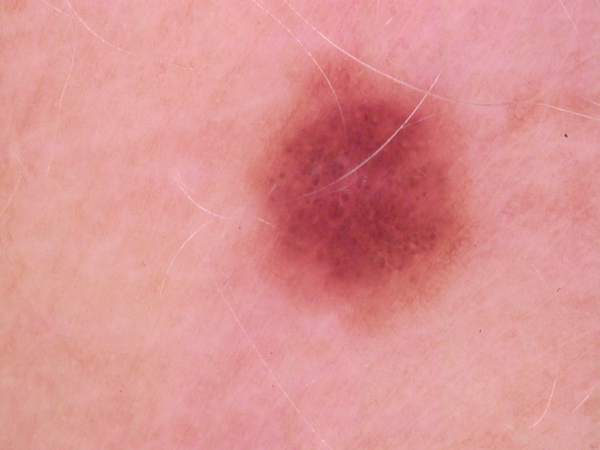

('nv', ' melanocytic nevi')


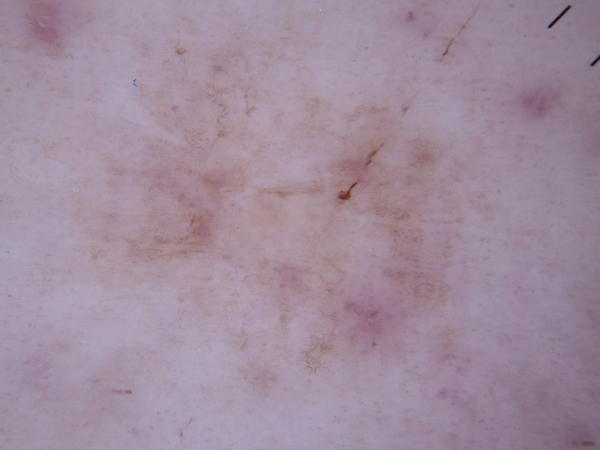

('nv', ' melanocytic nevi')


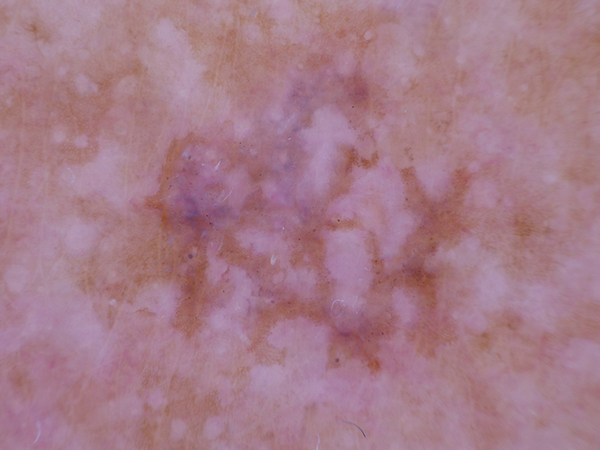

('nv', ' melanocytic nevi')


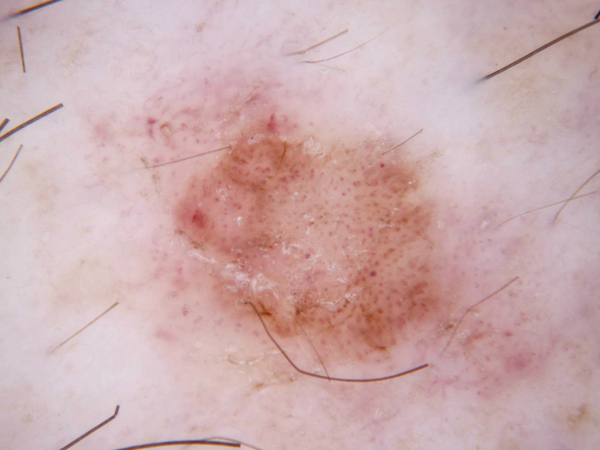

('nv', ' melanocytic nevi')


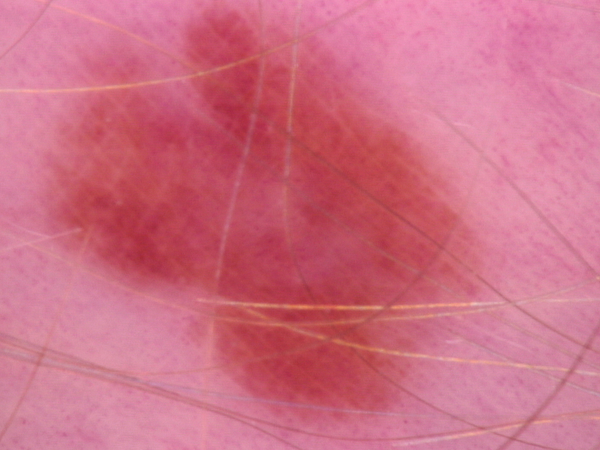

('nv', ' melanocytic nevi')


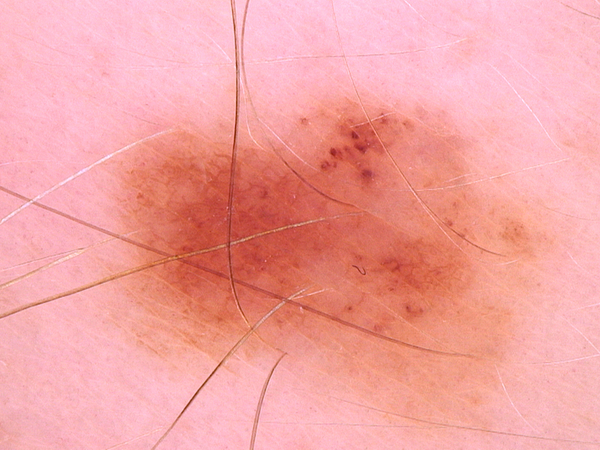

('nv', ' melanocytic nevi')


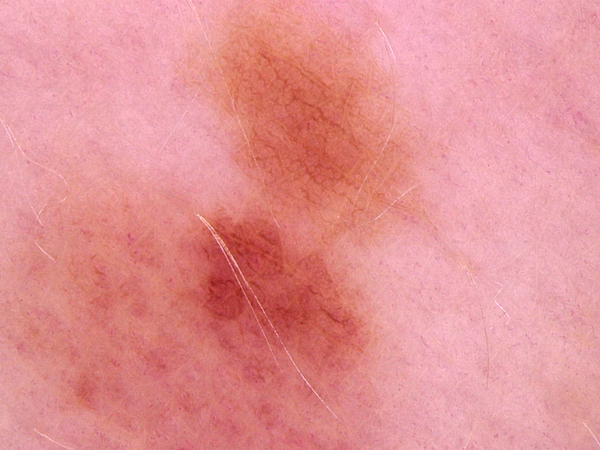

('nv', ' melanocytic nevi')


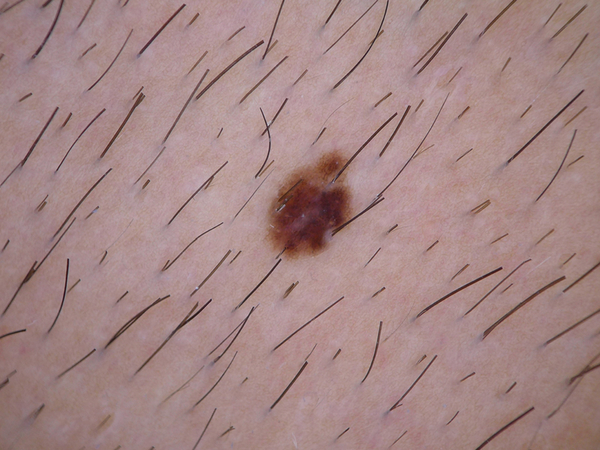

('nv', ' melanocytic nevi')


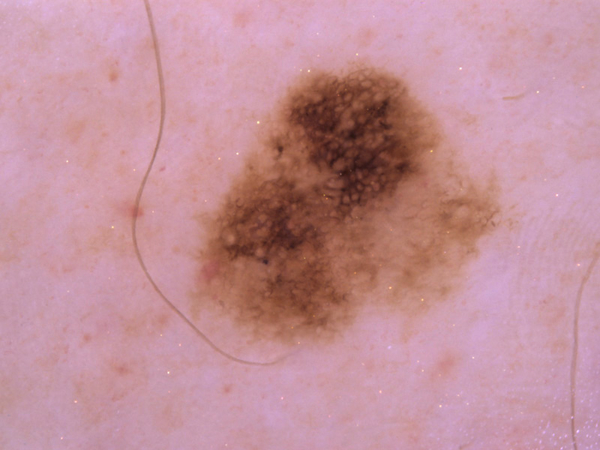

('nv', ' melanocytic nevi')


In [22]:
!pip install google.colab
from google.colab.patches import cv2_imshow
srcdir = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break